In [1]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# 2. Load Dataset
original_df = pd.read_csv('Titanic-Dataset.csv')  
df = original_df.copy()  # work on a copy to keep original dataset intact

In [3]:
# 3. Initial Data Overview
print("Initial Shape:", df.shape)
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Initial Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin 

In [4]:
# 4. Handling Missing Values
# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [5]:
# 5. Encode Categorical Features
# Label Encoding for 'Sex' and 'Embarked'
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # male:1, female:0
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [6]:
# 6. Drop Unnecessary Columns
df.drop(columns=['Name', 'Ticket'], inplace=True)

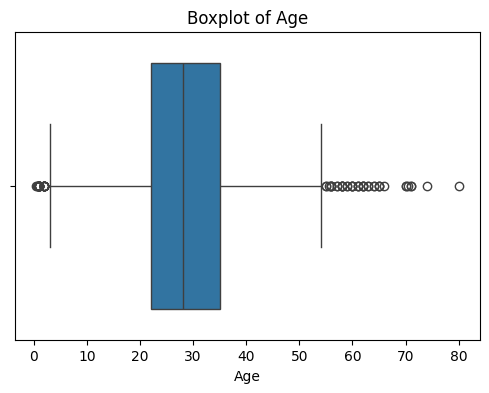

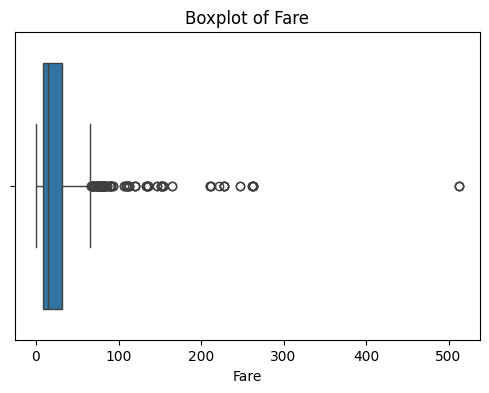

In [7]:
# 7. Detect and Remove Outliers (Boxplot Visualization)
def plot_box(column):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

for col in ['Age', 'Fare']:
    plot_box(col)

# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')

In [8]:
# 9. Final Null Check
print("\nRemaining Nulls:\n", df.isnull().sum())


Remaining Nulls:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [9]:
# 10. Save Cleaned Data
df.to_csv('titanic_cleaned.csv', index=False)
print("\n Cleaned dataset saved as 'titanic_cleaned.csv'")


 Cleaned dataset saved as 'titanic_cleaned.csv'
